**Parts that you should complete are specified by ```#TODO```.

In this assignment we will use SLIC algorithm for image segmentation. You should use ```skimage.segmentation.slic```. Afterwards, we will use RAG merging algorithm with different thresholds.

You should do the following steps:
- Apply the SLIC algorithm on the image. Set ```n_segments=20``` and ```compactness=20.0```. Show the result.  
- Afterwards, run the RAG mergin algorithm with threshold 10 on the edges. Show the output. You should use the functions [graph.rag_mean_color](https://scikit-image.org/docs/dev/api) and [graph.cut_threshold](https://scikit-image.org/docs/dev/api/skimage.future.graph.html#skimage.future.graph.cut_threshold). Afterwards, you should use the function ```display_edges``` (provided in the notebook) to show the graph on the image.


- The last cell shows the outputs for different values of threshold. Explain the role of the threshold parameter, and justify the outputs. Write down your answer in the part specified by ```TODO:answer```.






In [80]:
!wget -q -nc https://raw.githubusercontent.com/pseprivamirakbarnejad/cmput206lab/master/Lab7/horse.jpg
!ls


horse.jpg  sample_data


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from skimage import data, io, segmentation, color
from skimage import io, filters, img_as_ubyte
from scipy.signal import convolve2d as conv2
from skimage.color import rgb2hsv
from skimage.future import graph
import scipy.ndimage
import skimage
from skimage.measure import regionprops
from skimage import draw
import math
#from lab7util import *
def display_edges(image, g, threshold):
    """Draw edges of a RAG on its image
 
    Returns a modified image with the edges drawn.Edges are drawn in green
    and nodes are drawn in yellow.
 
    Parameters
    ----------
    image : ndarray
        The image to be drawn on.
    g : RAG
        The Region Adjacency Graph.
    threshold : float
        Only edges in `g` below `threshold` are drawn.
 
    Returns:
    out: ndarray
        Image with the edges drawn.
    """
    image = image.copy()
    plt.imshow(image)
    for edge in g.edges:#g.edges_iter():
      try:
          n1, n2 = edge
          #print(g[n1][n2]['weight'])
          if g[n1][n2]['weight'] < threshold :
            r1, c1 = rag.nodes[n1]['centroid'] #map(int, rag.nodes[n1]['centroid'])
            r2, c2 = rag.nodes[n2]['centroid'] #map(int, rag.nodes[n2]['centroid'])
    
            line  = plt.plot([c1,c2],[r1,r2])#draw.line(r1, c1, r2, c2)
            circle = plt.Circle((r1,c1),20)
    
            # if g[n1][n2]['weight'] < threshold :
            #     image[line] = 0,1,0
            # image[circle] = 1,1,0
      except:
        pass
    return image


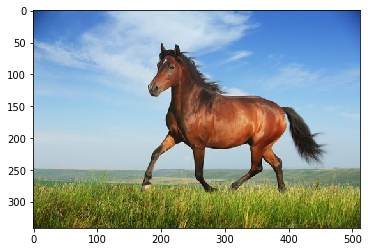

In [82]:
img_name = "horse.jpg"
img = io.imread(img_name)
plt.figure()
plt.imshow(img)
plt.show()

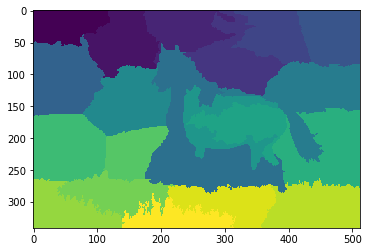

In [83]:
#TODO: Apply the SLIC algorithm on the image. Show the result.


segments = segmentation.slic(img,n_segments=20, compactness=20.0)
plt.figure()
plt.imshow(segments)
plt.show()



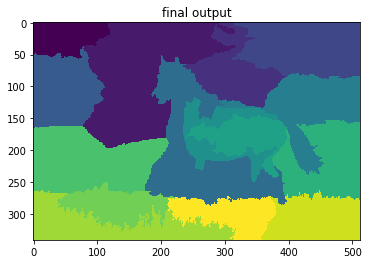

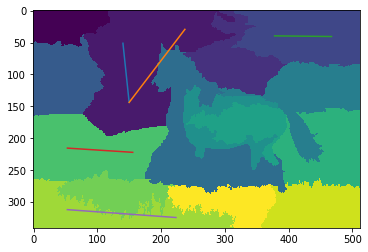

In [84]:
#TODO: run the RAG mergin algorithm with threshold 10 on the edges. Show the output.

rag = graph.rag_mean_color(img, segments)

regions = regionprops(segments)
for region in regions:
    rag.nodes[region['label']]['centroid'] = region['centroid']

new_labels = graph.cut_threshold(segments, rag, 20)
plt.title("final output")
plt.imshow(new_labels)
plt.show()

edgeImg = display_edges(new_labels, rag, 20)




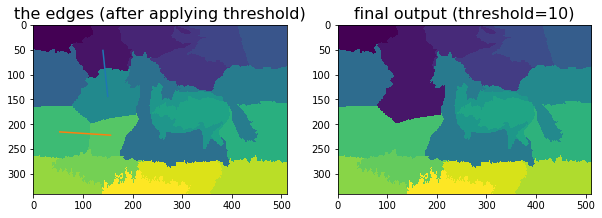

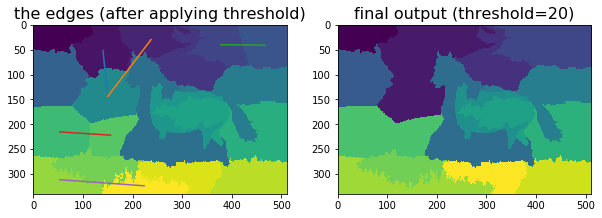

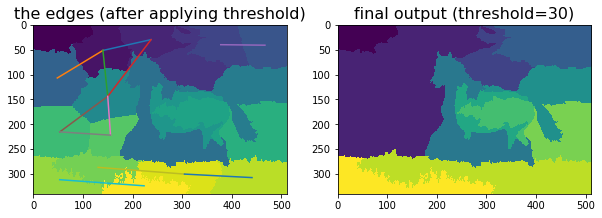

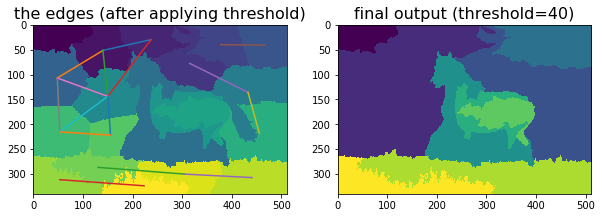

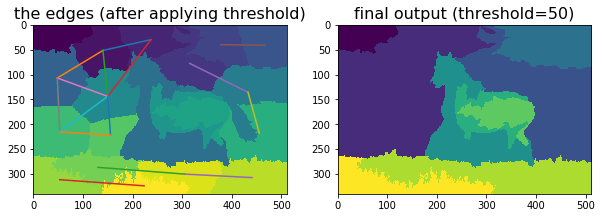

#TODO:answer

Explain the role of the threshold parameter, and justify the outputs. Write down your answer in the part specified by TODO:answer.




In [85]:
"The role of threshold parameter is that any point under the threshold will be shown and anything above will not be displayed. Increaing threshold will then produce more points which is seen in the output images above. The segments from the image will also start to merge more together if they are close to each other and have somewhat the same color."

'The role of threshold parameter is that any point under the threshold will be shown and anything above will not be displayed. Increaing threshold will then produce more points which is seen in the output images above. The segments from the image will also start to merge more together if they are close to each other and have somewhat the same color.'